# ARM Assembly Language in a Notebook

## Introduction 👋

Welcome to the brand new ARM Assembly Language Notebook. This notebook is being developed as part of Samuel Alarco's final year project for his undergraduate degree in Computer Science at Trinity College Dublin. We hope for it to be a useful tool in your journey to understand ARM Assembly language and the ARM processor. 

If you have feedback, problems, or feature suggestions, feel free to write to Samuel [here](mailto:alarcocs@tcd.ie).

Enjoy!

## Simple Mechanics ⚙️

This notebook is emulating an ARM Cortex M3 processor in the backend. The processor runs the code in the boxes, and updates its state (registers, flags, memory contents etc). You can then inspect its state using several visualizations. Let's give it a try!

To run code boxes, press *Shift + Enter*.

In [1]:
mov r0, #1

We have placed the immediate value *1* on **register 0**. How can we inspect the value of registers to make sure this worked? For this we use *show* commands

### Show Commands 👀

*Show* commands are not part of the ARM Assembly language. They are part of a collection of commands that help us inspect the state of the processor and execute actions outside of ARM's capabilities. These *meta-commands* start with >>> to differentiate them from regular ARM Assembly language commands.

Let's inspect the contents of register 0

In [2]:
>>> show registers[0]

r0:,1


*Show* commands are really powerful. We can use them to learn how our programs modify the state of the processor in many ways. 

For example:

Running ```>>> show registers``` will display the default 12 registers.

In [3]:
>>> show registers

r0:,1
r1:,0
r2:,0
r3:,0
r4:,0
r5:,0
r6:,0
r7:,0
r8:,0
r9:,0
r10:,0


You can select a subset of registers to display using the \[...\] array syntax. 

In [4]:
>>> show registers[0-3]

r0:,1
r1:,0
r2:,0
r3:,0


You can also use special shortcuts to select special registers:

|Register|Shortcut|
|---------|-------|
| Stack Pointer | sp |
| Link Register | lr |
| Program Counter | pc |

In [5]:
>>> show registers[sp]

sp:,1048576


You can even modify the base of the results using the *as (dec|hex|bin)* syntax:

In [6]:
>>> show registers[0-2] as hex

r0:,0x1
r1:,0x0
r2:,0x0


There are many more show commands to inspect things like the stack, memory, etc, but we will learn them as we go!

### Cumulative Runs 🏃

This is a very important concept to understand! Code runs in this notebook are **cumulative**. You can run the code in the boxes as many times as you want, and each run will have a cumulative effect on the processor. The best way to understand this is to try it out.

Run the code in the box below several times. You can do this by clicking the box, running it (use the play button or press *Shift + Enter*), and then repeating.

In [7]:
add r0, #1
>>> show registers[0]

r0:,4


You will notice that each time you run the box above, the contents of **register 0** change: we add 1 each time. This is what we mean by *cumulative effects*. 

Depending on the situation, this might not be what you want. You can resolve this by resetting the register contents at the beginning of a block:

In [8]:
mov r0, #0
add r0, #1
>>> show registers[0]

r0:,1


Now no matter how many times we run the code block, the result is always the same.

### Resetting the Processor 🔁

This environment is designed to encourage play and experimentation with an ARM processor.There are times in which you might want to start on a clean slate. You might have messed up the state, or simply want to redo something and are not willing to use ARM commands to reset the processor to an earlier state. The emulation is also not bug free, and so there are occassions in which a reset might be necessary to continue using the notebook.

Jupyter lab offers two buttons to reset the "kernel" ie. the emulated processor: 

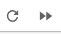

These can be found at the top of the notebook, just below the tab:

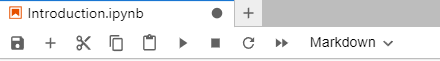

 will reset the processor, giving you a clean slate to continue playing with.

 will reset the processor AND run all the cells one time in order.

## Sample Programs 👩‍💻

Best way to learn is by doing! Here are some examples that demonstrate the usage of several features of the notebook. Happy coding!

### Loops and Labels ➿

Labels and branching are a key aspect of ARM assembly, allowing you to program logic, loops, and even subroutines!

**Important**: Labels in this notebook are only accessible inside the block they are declared in. You will not be able to access labels across blocks. 

In [36]:
    // Fibonacci Sequence
    mov r0, #0 // n
    mov r1, #1 // n+1
    mov r2, #1 // counter (n fibonacci number)
    mov r3, #0 // result

    cmp r2, #0
    beq end
    cmp r2, #1
    moveq r3, #1
    beq end

for:
    cmp r2, #2
    beq endfor
    add r3, r1, r0
    mov r0, r1
    mov r1, r3
    sub r2, #1
    b for

endfor:
    mov r3, r1

end:

>>> show registers[3]

r3:,1


### Stacks 🗼

We can see the stack using the ```show stack``` syntax.

In [38]:
>>> show stack

Address,Content,SP
0x100000,Bottom,←


Lets push some stuff into the stack and see the effect:

In [41]:
mov r1, #1
mov r2, #2
mov r3, #3
push {r1 - r3}

>>> show stack as hex

Address,Content,SP
0x100000,Bottom,
0xffffc,0x3,
0xffff8,0x2,
0xffff4,0x1,←


In [42]:
pop {r1 - r3}

>>> show stack as hex

Address,Content,SP
0x100000,Bottom,←


### Flags 🚩

Status flags are an important part of ARM Assembly programming. A good example are the NZCV flags. We know it can be tricky to figure out how they work. Why dont you experiment a little with them?

In [52]:
// Try to turn on each flag individually

movs r0, #0
>>> show nzcv

N,Z,C,V
0,1,0,0


### Memory 🧠

Managing memory can be tricky. In this notebook we use a specialized syntax to initialize memory and abstract most of the complexity from the user. For this we use YAML! If you are not familiar with YAML, it might be worth it to take a look at the official documentation, although it is very easy to pick up 😄.

We will use a special ```__config___``` block. Config blocks must start with the *__config__* keyword, for example:

In [53]:
__config__
memory: # Config relating to the memory.
    items: # Specific items that will be automatically mapped to memory.
        label1:               # This is the label through which you can access the specified memory item.
            type: word        # Type of each element (word | hword | byte | int | space)
            access: ro        # Access permissions: ro - read-only; rw - read-write
            size: 3           # Size of memory block (if left blank then the size will be calculated from the content)
            content: [1,2,3]  # Contents. Can be a list of items or a single item

-- kernel configured successfully --

In [55]:
ldr r0, =label1
ldr r1, [r0]
ldr r2, [r0, #4]

>>> show registers[0-2] as hex

r0:,0x580000
r1:,0x1
r2:,0x2


Memory can also be inspected through *show* commands.

- ```show mem[<label>] as hex``` will show the item <label> divided into words as hex
- ```show memh[<label>] as dec``` will show the item <label> divided into half-words
- ```show memb[<label>] as hex``` will show the item <label> divided into individual bytes

In [58]:
>>> show memb[label1] as hex

Memory: 
 
 
 Address 
 Content 
 
 
 0x580000 
 
 0x1 
 
 0x0 
 
 0x0 
 
 0x0 
 
 

 
 0x580004 
 
 0x2 
 
 0x0 
 
 0x0 
 
 0x0 
 
 

 
 0x580008 
 
 0x3 
 
 0x0 
 
 0x0 
 
 0x0

**Note**: While config blocks can be placed anywhere in the notebook, we recommend to place them at the top of the notebook so that the configuration is available from the very beginning. Also remember that config blocks must be **run** for them to take effect.